## PCA with IRIS Data
---

Training with High value Principle component.

In [2]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True)
di = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3 }

df['class'].replace(di, inplace=True)

In [4]:
feat_cols = list(df)[:4]

In [5]:
import warnings
warnings.filterwarnings('ignore')

print 'Feature columns : {}'.format(','.join(feat_cols))
X = df.ix[:, 0:4].values
y = df.ix[:, 4].values

Feature columns : sepal_len,sepal_wid,petal_len,petal_wid


PCA Explained Variance Ratio :  [0.92461621 0.05301557 0.01718514 0.00518309]


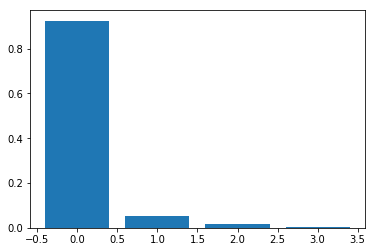

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df[feat_cols].values)

pca_df = pd.DataFrame(pca_result, columns=['pc1', 'pc2', 'pc3', 'pc4'])

print 'PCA Explained Variance Ratio : ', pca.explained_variance_ratio_
plt.bar(range(4), pca.explained_variance_ratio_)
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

for name, model in models:
    cross_score = cross_val_score(model, np.array(pca_df['pc1']).reshape(-1, 1), df['class'], cv=3, verbose=0)
    print 'Model : {}, Score : {}'.format(name, np.mean(cross_score))

Model : LR, Score : 0.861519607843
Model : LDA, Score : 0.940359477124
Model : KNN, Score : 0.933823529412
Model : CART, Score : 0.90114379085
Model : NB, Score : 0.947303921569
Model : SVM, Score : 0.927696078431


## Training Data with Real values
---

In [8]:
for name, model in models:
    cross_score = cross_val_score(model, np.array(df['sepal_len']).reshape(-1, 1), df['class'], cv=3, verbose=0)
    print 'Model : {}, Score : {}'.format(name, np.mean(cross_score))

Model : LR, Score : 0.674019607843
Model : LDA, Score : 0.733251633987
Model : KNN, Score : 0.692401960784
Model : CART, Score : 0.665441176471
Model : NB, Score : 0.71977124183
Model : SVM, Score : 0.71364379085


## Closing Thoughts
---

- Training with **Principle Component 1** provides better accuracy score as observed.